# Iris Flower Dataset

# Summarization of Learning

## 9 steps of EDA
1. Define Problem
2. Choose right tools
3. Collection of data
4. Pre-profile
5. Pre processing of data (Clean, remove unnecessary, add relevant data)
6. Post-profile
7. Ask right Questions
8. Conclusion or Summarization
9. Actionable Insights (low hanging fruits)


## 7 Stages of ML
1. Data Collection
2. Data Preparation
3. Choose Model
4. Train Model
5. Evaluate Model
6. Improve Model
7. Predict Model

# Introduction

## Problem Statement 

Iris is a genus of 260–300 species of flowering plants with showy flowers. Iris is also widely used as a common name for all Iris species. Iris is extensively grown as ornamental plant in home and botanical gardens. The Iris flowers color ranges from white, pink, orange, purple, lavender.

# Importing Packages

## Importing and Installing the packages

In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)              # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                 # To display all the data in each column
pd.set_option('display.precision', 5)                       # To display values only upto three decimal places.
pd.options.display.max_columns = 50                         # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format  
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)                      # To apply seaborn styles to the plots.

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime, timedelta                     #for datetime, as we have a date column in this dataset

## Handling warnings

In [3]:
warnings.filterwarnings('ignore')                                                                           # ignore warnings.
%config IPCompleter.greedy = True                                                                      # autocomplete feature.
pd.options.display.max_rows = None                                        # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None                                  # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 4                                                 # set the precision of floating point numbers.

# Loading Data

## Description of Data

There are almost 300 different species of Iris has been already discoverd, for our Data Science purpose we are going to make EDA for following 3 different Iris species:

1. Setosa
2. Versicolor
3. Virginica

The flowers are classified by the features

1. sepal lenght in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

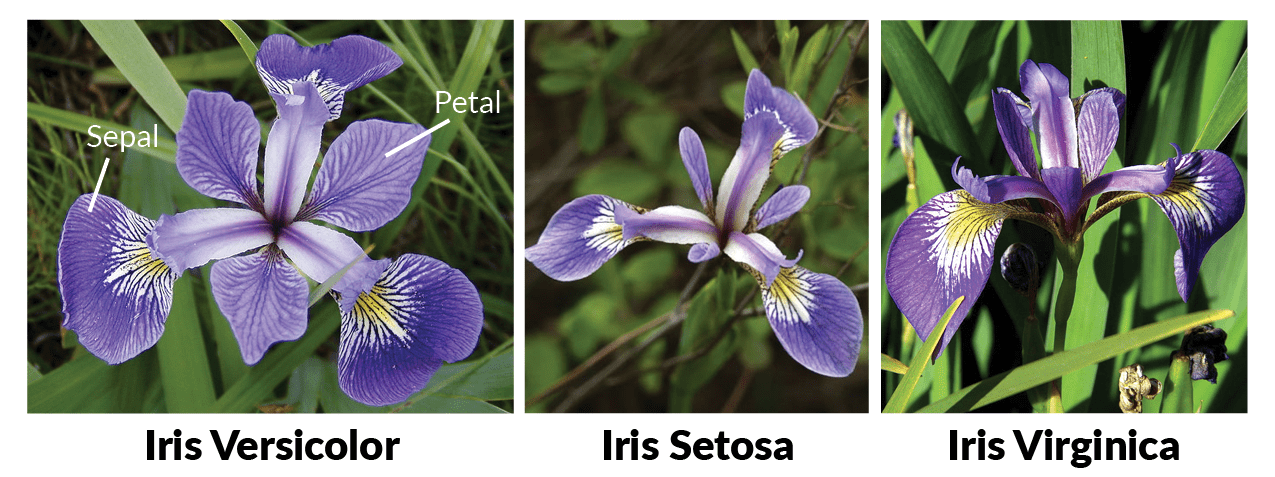

In [4]:
# Importing training dataset using pd.read_csv
df = pd.read_csv("C://Users//jeete//OneDrive//Desktop//Kasturi//Machine Learning//ML2//ML2 Project//IRIS.csv")


In [5]:
# to have a quick glance of data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [6]:
#to identify null, missing data and the type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<span style='background:orange'>Observation:There are 150 rows, 5 columns



In [7]:
#listing the column names, so it is easy to copy paste later during Train/test data
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
# to find the shape of the data, though seen in the .info() , double checking here
df.shape

(150, 5)

<span style='background:orange'>Observation:As seen above in .info() we have 150 rows and 5 columns</span>

In [9]:
# to check for the null values. Already checked in .info(), double checking here
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<span style='background:orange'> Observation: There is no null data </span>

In [10]:
df.describe(include='all')              # Information about the data to describe the major attributes

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,nan,nan,nan,nan,3
top,nan,nan,nan,nan,Iris-setosa
freq,nan,nan,nan,nan,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


## Summary Of the Data
- We have 150 rows and 5 columns. 
- 1 column is the name of the species (object data type)
- There are 4 columns showing the sepal length, sepal width, petal length and petal width (float data type)
- There is no missing or null data
- As expected only the species is an object type
- Other columns have float data

## Handling Duplciate Rows

In [11]:
df[df.duplicated(keep='first')].shape

(3, 5)

In [12]:
before_shape = df.shape
print('Data Shape [Before]:', before_shape)

df.drop_duplicates(inplace = True)

after_shape = df.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 2) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (150, 5)
Data Shape [After]: (147, 5)
Drop Ratio: 2.0 %


<span style='background:orange'> Observation: </span>
    
- After removing the duplicate values, we have 147 Rows and 5 Columns

# EDA (Exploratory Data Analysis)

## Univariate Analysis

**Let us analyse and see the % each type of species is available**

In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
# to display number of samples on each class
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

### Bar chart showing the proportion of each Species

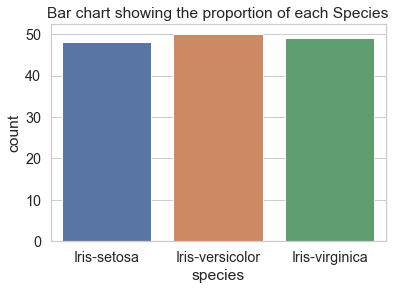

In [15]:
sns.countplot('species',data=df)
plt.title('Bar chart showing the proportion of each Species')
plt.show()

### Pie chart showing the proportion of each Species

Text(0.5, 1.0, 'Pie chart showing the proportion of each Species')

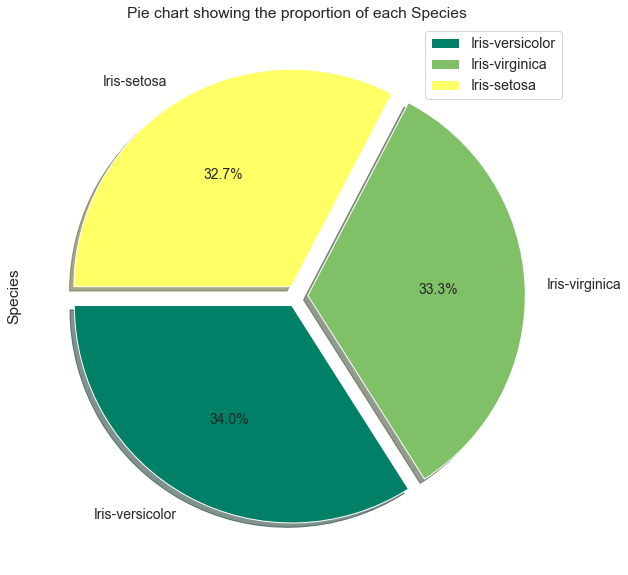

In [16]:
df['species'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], autopct='%3.1f%%', fontsize=14,  
                                               figsize=(10,10), shadow=True, startangle=900, legend=True, cmap='summer')

plt.ylabel('Species')
plt.title('Pie chart showing the proportion of each Species')

<span style='background:orange'> Observation: All the species have same values </span>

### Variation of Species on the basis of petal_length

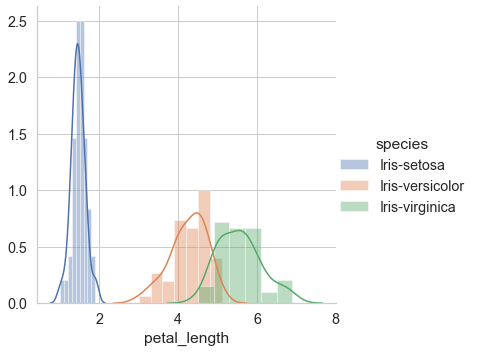

In [17]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_length").add_legend();

### Variation of Species on the basis of petal_width

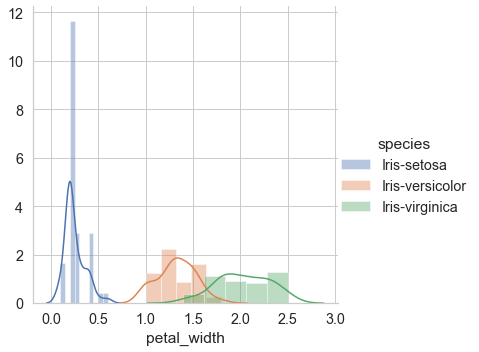

In [18]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_width").add_legend();

### Variation of Species on the basis of sepal_length

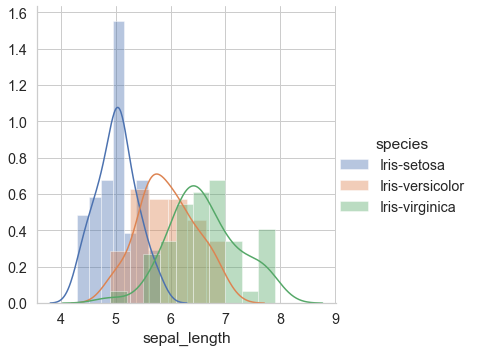

In [19]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend();

### Variation of Species on the basis of sepal_width

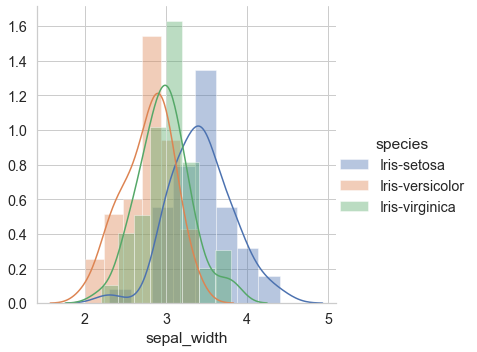

In [20]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend();

### All columns Histogram

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

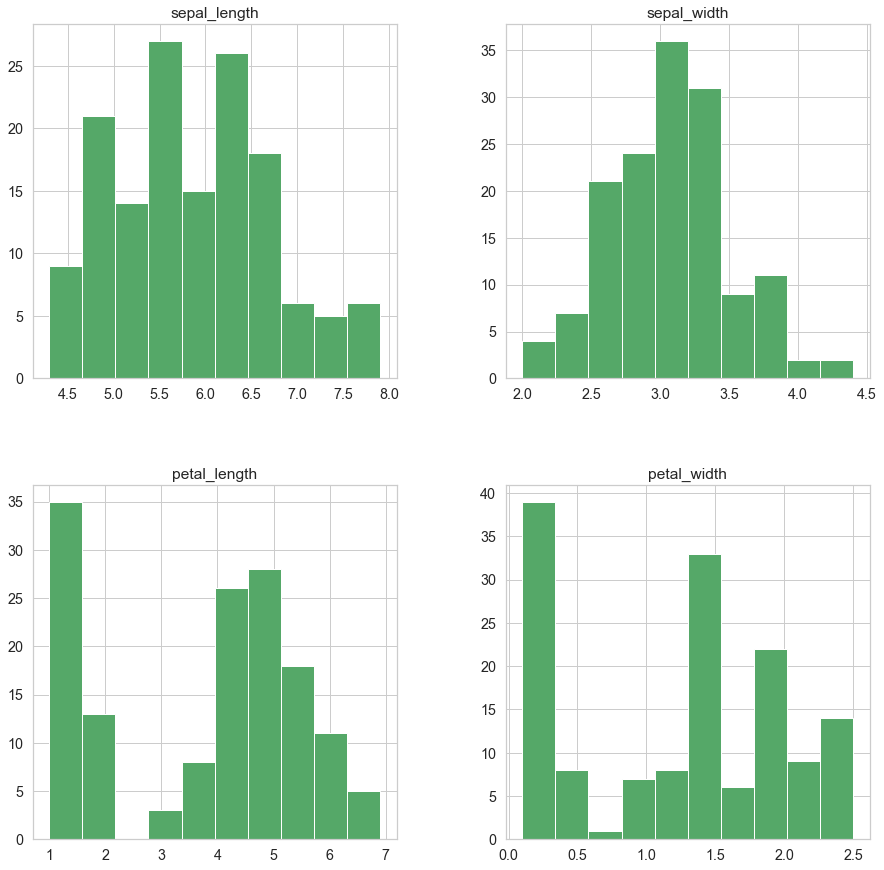

In [21]:
df.hist(figsize = (15,15),color='g')

<span style='background:orange'> Observation: </span>
 
- Sepal Length and Sepal Width column are normally distributed over the histogram

## Bivariate Analysis

**Notes**: Now let us compare the Features with the Target Variable and do a deeper analysis

In [22]:
features=df.drop(columns='species')

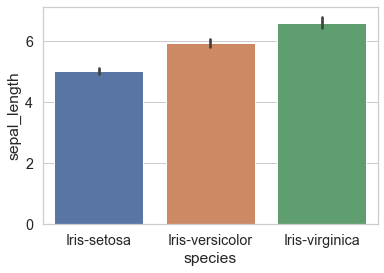

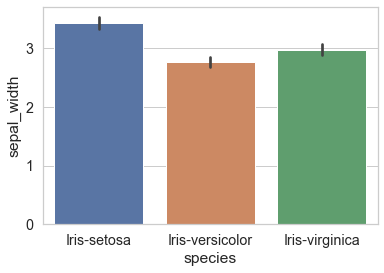

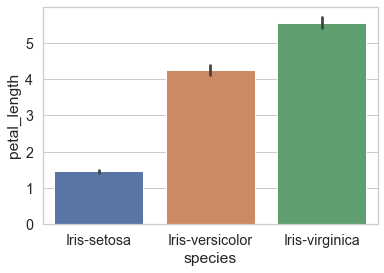

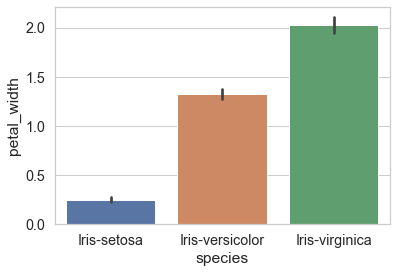

In [23]:
for col in features.columns:
    
    plt.figure()
    sns.barplot(x="species",y=features[col],data=df)
     

plt.show()

### Scatter plot showing the variation of Sepal Length with Sepal Width

In [24]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

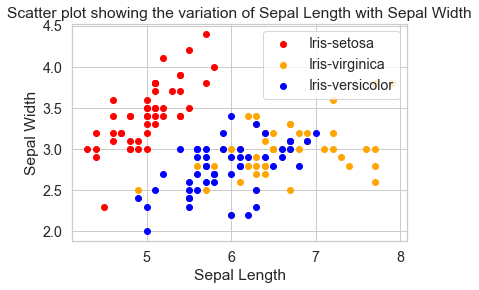

In [25]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label= species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot showing the variation of Sepal Length with Sepal Width')
plt.legend()

<span style='background:orange'> Observation: From above plot using sepal length and sepal width, the setosa variety is easily distinguishable. The versicolor and virginica are overlapping, so harder to distinguish. </span>

### Scatter plot showing the variation of Petal Length with Petal Width

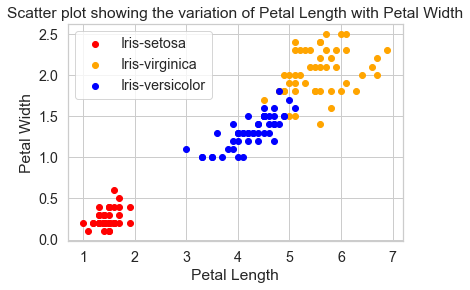

In [26]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label= species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot showing the variation of Petal Length with Petal Width')
plt.legend()

<span style='background:orange'> Observation: From above plot using petal length and petal width, the setosa variety is easily distinguishable. The versicolor and virginica are overlapping, so harder to distinguish. </span>

### Scatter plot showing the variation of Sepal Length with Petal Length

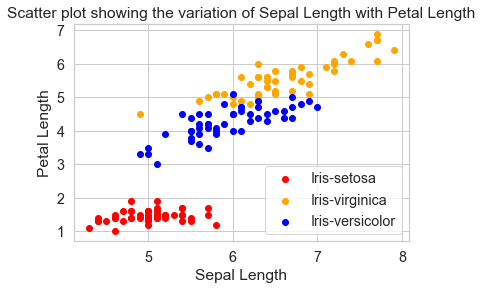

In [27]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i], label= species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter plot showing the variation of Sepal Length with Petal Length')
plt.legend()

<span style='background:orange'> Observation: From above plot using petal length and sepal length, the setosa variety is easily distinguishable. The versicolor and virginica are overlapping, so harder to distinguish. </span>

### Scatter plot showing the variation of Sepal Width with Petal Width

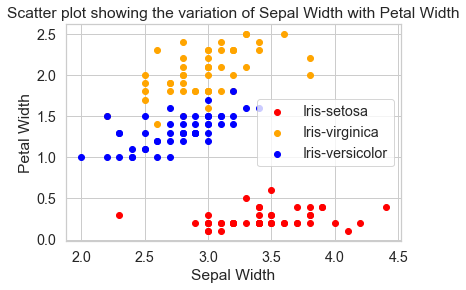

In [28]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i], label= species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Scatter plot showing the variation of Sepal Width with Petal Width')
plt.legend()

<span style='background:orange'> Observation: From above plot using petal width and sepal width, the setosa variety is easily distinguishable. The versicolor and virginica are overlapping, so harder to distinguish. </span>

## Pairplot

<Figure size 504x504 with 0 Axes>

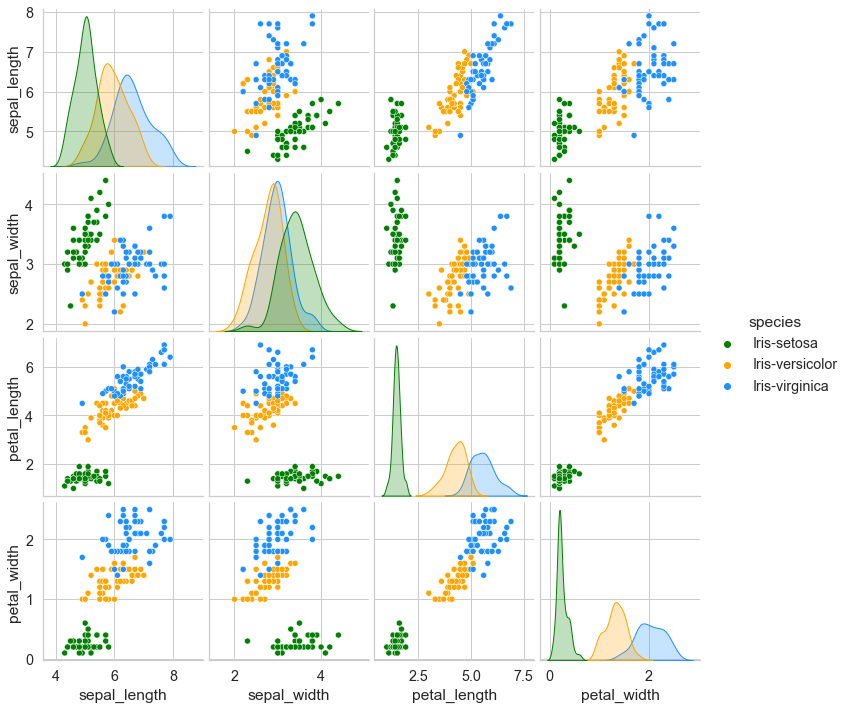

In [29]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='species', palette=['green','orange','dodgerblue'])

<span style='background:orange'> Observation: In case of sepal length and sepal width, setosa is easily seperable but versicolor and virginica have some overlap. In case of petal length and petal width, all the species are quite seperable. </span>

## Correlation

We can corelate the data using heatmap (visual form) and in a tabular form as well, to sort the data easily

In [30]:
dfcor=df.corr()
dfcor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


### Visual Form (Heatmap)

<AxesSubplot:>

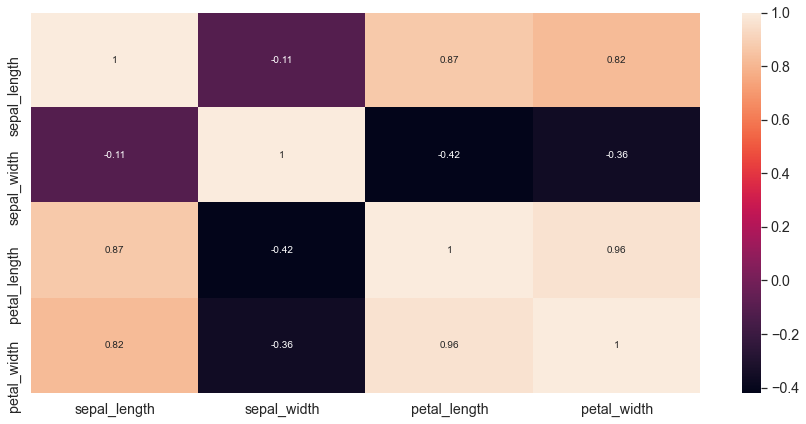

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

### Tabular Form, to see the top co-relations more easily

In [32]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [33]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(df))

,Feature1,Feature2,corr
0,petal_length,petal_width,0.96
1,sepal_length,petal_length,0.87
2,sepal_length,petal_width,0.82
3,sepal_length,sepal_width,-0.11
4,sepal_width,petal_width,-0.36
5,sepal_width,petal_length,-0.42


<span style='background:orange'> Observation: </span>

- petal_length is highly co-related to petal_width
- The correlation between the Sepal Width and petal_length was very low 

## Label Encoding

We have to convert "species" columns to numerical form

In [34]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [35]:
df['species'].value_counts().sort_index()

0    48
1    50
2    49
Name: species, dtype: int64

<span style='background:orange'> Observation: </span>

- We have converted species to numerical form. Applied label encoding

## Correlation with Variable

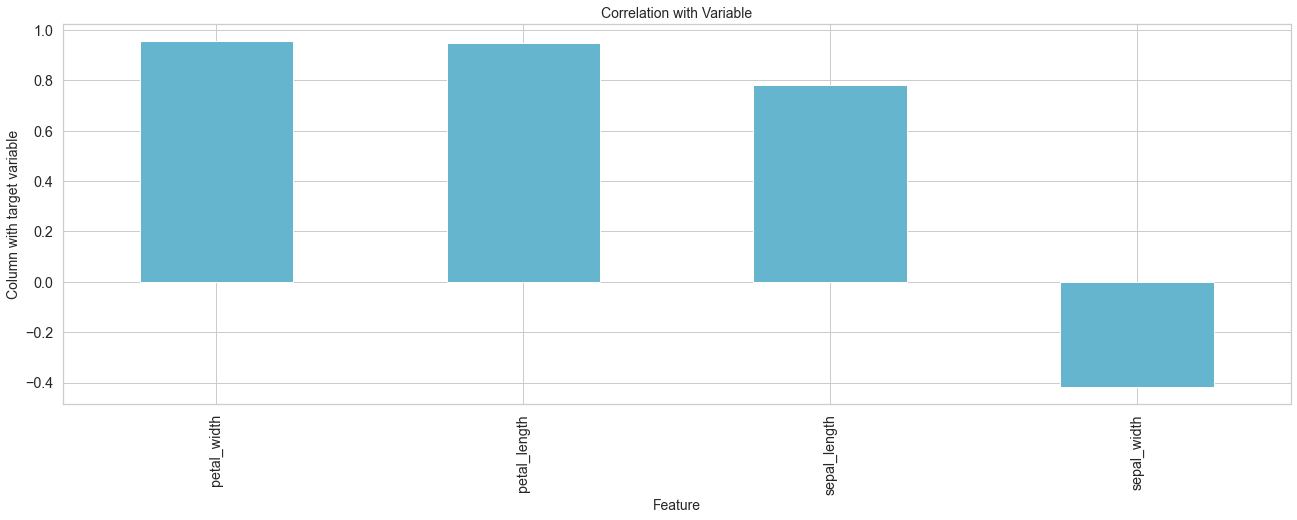

In [36]:
plt.figure(figsize=(22,7))
df.corr()['species'].sort_values(ascending=False).drop(['species']).plot(kind="bar",color='c')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target variable",fontsize=14)
plt.title("Correlation with Variable",fontsize=14)
plt.show()

<span style='background:orange'> Observation: </span>

- We have seen multiple ways to check the co-relation with the target varialbe
- The last graph makes it very clear that "sepal_width" is close to 0 co-relation
- All the Features have positive or a negative co-relation 

## Handling Outlier

sepal_length       AxesSubplot(0.125,0.71587;0.133621x0.16413)
sepal_width     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
petal_length     AxesSubplot(0.44569,0.71587;0.133621x0.16413)
petal_width     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
species         AxesSubplot(0.766379,0.71587;0.133621x0.16413)
dtype: object

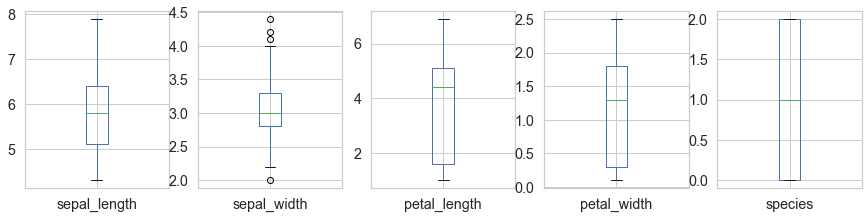

In [37]:
# Plotting the Boxplot for each column to check the outlier
df.plot(kind="box", subplots= True, layout= (4,5), figsize= (15,15))

<span style='background:orange'> Observation: </span>

- From above image we can clear see that there are number of black dots in "sepal_width" column which are referring to the outliers, so it means the data in this column are outside the distribution
- The second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, Zscore values

## Applying Z Score

In [38]:
#abs is absolute value
#df [condition], whatever condition it matches, it retains and others are removed
#here z score <3, it is retained and Z> 3 is removed
from scipy.stats import zscore

In [39]:
z = np.abs(zscore(df))
print(z)

[[0.91550949 1.0199714  1.35773692 1.33570001 1.2394597 ]
 [1.15755966 0.12808217 1.35773692 1.33570001 1.2394597 ]
 [1.39960983 0.33113926 1.41477817 1.33570001 1.2394597 ]
 [1.52063491 0.10152855 1.30069567 1.33570001 1.2394597 ]
 [1.03653457 1.24958212 1.35773692 1.33570001 1.2394597 ]
 [0.55243423 1.93841426 1.18661318 1.07090176 1.2394597 ]
 [1.52063491 0.79036069 1.35773692 1.20330089 1.2394597 ]
 [1.03653457 0.79036069 1.30069567 1.33570001 1.2394597 ]
 [1.76268509 0.35769288 1.35773692 1.33570001 1.2394597 ]
 [1.15755966 0.10152855 1.30069567 1.46809914 1.2394597 ]
 [0.55243423 1.47919283 1.30069567 1.33570001 1.2394597 ]
 [1.27858474 0.79036069 1.24365442 1.33570001 1.2394597 ]
 [1.27858474 0.12808217 1.35773692 1.46809914 1.2394597 ]
 [1.88371017 0.12808217 1.52886066 1.46809914 1.2394597 ]
 [0.06833389 2.16802498 1.47181942 1.33570001 1.2394597 ]
 [0.18935898 3.08646783 1.30069567 1.07090176 1.2394597 ]
 [0.55243423 1.93841426 1.41477817 1.07090176 1.2394597 ]
 [0.91550949 1

In [40]:
threshold= 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   2,   2,   2,
         2,   2,   3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   5,
         5,   5,   5,   5,   6,   6,   6,   6,   6,   7,   7,   7,   7,
         7,   8,   8,   8,   8,   8,   9,   9,   9,   9,   9,  10,  10,
        10,  10,  10,  11,  11,  11,  11,  11,  12,  12,  12,  12,  12,
        13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,  15,  15,
        15,  16,  16,  16,  16,  16,  17,  17,  17,  17,  17,  18,  18,
        18,  18,  18,  19,  19,  19,  19,  19,  20,  20,  20,  20,  20,
        21,  21,  21,  21,  21,  22,  22,  22,  22,  22,  23,  23,  23,
        23,  23,  24,  24,  24,  24,  24,  25,  25,  25,  25,  25,  26,
        26,  26,  26,  26,  27,  27,  27,  27,  27,  28,  28,  28,  28,
        28,  29,  29,  29,  29,  29,  30,  30,  30,  30,  30,  31,  31,
        31,  31,  31,  32,  32,  32,  32,  32,  33,  33,  33,  33,  33,
        34,  34,  34,  34,  34,  35,  35,  35,  35,  35,  36,  

In [41]:
# Assigning the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]

In [42]:
print(df.shape)
print(df_new.shape)
df = df_new
print("Shape after removing outlier", df.shape)

(147, 5)
(146, 5)
Shape after removing outlier (146, 5)


<span style='background:orange'> Observation: </span>

- We find the zscore value and then we have decided to make one threshold value as 3 which is standard of industry recommend value
- We removed all the outliers which zscore value is greater than 3
- After removing the outlier finaily there are 146 rows and 5 columns presents in the data set

## Skewness

In [43]:
df_new.skew()

sepal_length    0.29
sepal_width     0.20
petal_length   -0.31
petal_width    -0.13
species        -0.03
dtype: float64

In [44]:
print("Number of numerical columns: ",len(df_new.skew()))
print("Number of columns which are skewed not in -0.5 to +0.5 range: ",len(df_new.skew().loc[abs(df_new.skew())>0.5]))

Number of numerical columns:  5
Number of columns which are skewed not in -0.5 to +0.5 range:  0


<span style='background:orange'> Observation: </span>

- We first calculated the skew value and all of the column skew value are near to zero
- The best skew value for normally distributes is very close to zero
- The skewness value near to zero will help to get better score

## Standard Scalar

I am using the standard scaling method on x variable

In [45]:
df_new.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,146.00,146.00,146.00,146.00,146.00
mean,5.86,3.05,3.80,1.21,1.01
std,0.83,0.42,1.75,0.76,0.81
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.40,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.20,6.90,2.50,2.00


In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_new)
x=sc.transform(df_new)
x=pd.DataFrame(df_new)

In [47]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,146.00,146.00,146.00,146.00,146.00
mean,5.86,3.05,3.80,1.21,1.01
std,0.83,0.42,1.75,0.76,0.81
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.40,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.20,6.90,2.50,2.00


# Machine Learning (Model Building)

## Importing Libraries

In [70]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## Train & Test Data

<span style='background:orange'>   We create a list of the Features and Target Variable (species) </span>

In [49]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']        
target = ['species']

In [50]:
df[features].head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
5,5.40,3.90,1.70,0.40
6,4.60,3.40,1.40,0.30
7,5.00,3.40,1.50,0.20
8,4.40,2.90,1.40,0.20
9,4.90,3.10,1.50,0.10


In [51]:
df[target].head(10)

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [52]:
x = df[features]
y = df[target]

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

In [54]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
79,5.70,2.60,3.50,1.00
19,5.10,3.80,1.50,0.30
48,5.30,3.70,1.50,0.20
53,5.50,2.30,4.00,1.30
47,4.60,3.20,1.40,0.20


In [55]:
y_train.head()

,species
79,1
19,0
48,0
53,1
47,0


In [56]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
7,5.00,3.40,1.50,0.20
25,5.00,3.00,1.60,0.20
28,5.20,3.40,1.40,0.20
122,7.70,2.80,6.70,2.00
146,6.30,2.50,5.00,1.90


In [57]:
y_test.head()

,species
7,0
25,0
28,0
122,2
146,2


## Finding best Random state

In [58]:
maxAccu=0
BestRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)    
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        BestRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",BestRs)

Best accuracy is  0.9656429540900393 on Random_state   60


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=BestRs)

print('Train cases as below')
print('x_train shape : ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('***************************')
print('Test cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape :  (116, 4)
y_train shape:  (116, 1)
***************************
Test cases as below
x_test shape:  (30, 4)
y_test shape:  (30, 1)


## Building models and printing the evaluation Score

In [60]:
dt  = DecisionTreeClassifier()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [61]:
model=[gnb,rf,ad,dt,knn]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n Accuracy score: of ",m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    precision=precision_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')
    
    print(score)
    
    print("mean of cross val with scoring= accuarcy:",score.mean())
    
    print("precision:",precision.mean())
    
    print("recall",recall.mean())
    
    print("mean of cross val with scoring= auc roc :",cross_val_score(m,x,y,cv=5,scoring="roc_auc_ovr").mean())
    
    print("***************************************")


 Accuracy score: of  GaussianNB()
1.0
[[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.93333333 1.         0.89655172 0.93103448 1.        ]
mean of cross val with scoring= accuarcy: 0.9521839080459771
precision: 1.0
recall 1.0
mean of cross val with scoring= auc roc : 0.9896491228070176
***************************************

 Accuracy score: of  RandomForestClassifier()
1.0
[[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00    

In [71]:
modelList=[("GaussianNB",gnb),("Decision Tree", dt),("Random Forest",rf),("Kneighbor",knn), ("AdaBoostClassifier",ad)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=BestRs)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    modelCrossval1=[]
    RMSECVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        error=modelInstance.score(x_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,x,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='r2').mean()
        crossAcc1=cross_val_score(modelInstance,x,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='neg_root_mean_squared_error').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        modelCrossval1.append(crossAcc1)
        RMSECVDiff.append(RMSE-crossAcc1)
        
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "Cross Validation":modelCrossval,
                         "R2 and CV Difference":R2CVDiff,
                         "RMSE and CV Difference":RMSECVDiff
                          })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Error,R2,MAE,MSE,RMSE,Cross Validation,R2 and CV Difference,RMSE and CV Difference
0,GaussianNB,0.94,0.96,0.03,0.03,0.16,0.91,0.05,0.32
1,Decision Tree,1.00,1.00,0.00,0.00,0.00,0.90,0.10,0.18
2,Random Forest,1.00,1.00,0.00,0.00,0.00,0.91,0.09,0.16
3,Kneighbor,0.97,0.96,0.03,0.03,0.16,0.93,0.03,0.28
4,AdaBoostClassifier,0.94,0.96,0.03,0.03,0.16,0.89,0.07,0.34


<span style='background:orange'> Observation: </span>

- We have used 5 models for Model Building
- We have used 5 Evaluation Techniques
- We have evaluated the difference between R2 and Cross Validation. Also, the difference between RMSE and Cross Validation
- The best way to select a model is to have high R2 and low RMSE
- Random Forest and Decission Tree have high R2 and low RMSE
- Also, the difference between R2 and Cross Validation and the difference between RMSE and Cross Validation is low in case of Random Forest and Kneighbor Model

## Hyper Parameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

### Decision Tree Classifier

In [92]:
parameters ={"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "criterion" : ["gini", "entropy"],              
             }

In [93]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(6, 11)})

In [95]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [96]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=172,min_samples_split =6)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred,average='weighted')*100)

96.62618083670715


### Random Forest Classifier

In [87]:
parameters ={"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [88]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(6, 11)})

In [90]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [91]:
mod=RandomForestClassifier(criterion='entropy',max_depth=12,random_state=172,min_samples_split =6,bootstrap=True)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred,average='weighted')*100)

100.0


### K Neighbors Classifier

In [105]:
parameters = {"n_neighbors":range(2,30)}

In [106]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [107]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [108]:
GCV.best_params_

{'n_neighbors': 9}

In [112]:
mod2=KNeighborsClassifier(n_neighbors=3)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(r2_score(y_test,pred))

0.9548872180451128


<span style='background:orange'> Observation: </span>
- Hyper Parameter Tuning on the Feature Engineered Model, has improved for all
- Random Forest is the highest which is 100.0

# Conclusion

- We have built 5 models
- We have used F1score, precision, recall 
- Also, to avoid over fitting and under fiitng issues, we have used Cross Validation
- We have chosen the best model and done hyper Parameter tuning on it, to improve the performance
- Hyper Tuning was done on 3 models
- As per the evaluation with (80:20) training and testing data Random Forest is the best model
- The accuracy for Random Forest is 100%